# Ensemble Learning
##  Agenda
- Introduction to ensemble learning
    * Goals of ensemble learning
    * Importance of ensemble learning
    * Weak and Strong learners in Ensemble learning
- Categories in ensemble learning
    * Sequential ensemble technique
    * Parallel ensemble technique
- Simple techniques used in ensemble learning
    * Voting
        * Hard Voting
        * Soft Voting
- Advanced techniques used in ensemble learning
    * Bagging (bootstrap aggregating)
        * Bagging Techniques
        * Advantages of bagging
        * Disadvantages of bagging
        * Out-of-bag (OOB) concept
    * Boosting
        * Boosting Techniques
        * Advantages of boosting
        * Disadvantages of boosting
    * Stacking
        * Advantages of stacking
        * Disadvantages of stacking

## __Introduction to Ensemble Learning__
Ensemble learning combines multiple models to enhance the overall performance of machine learning algorithms. The fundamental principle of ensemble learning is combining predictions from multiple individual models to produce a more accurate and robust prediction than any single model.

### __Goals of Ensemble Learning__
- Enhance predictive accuracy by combining multiple models.
- Improve model robustness and generalization performance.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/ensemble_learning.png)



## __Importance of Ensemble Learning__
- Improves prediction accuracy by combining diverse models
- Enhances model resilience and robustness against uncertainties
- Mitigates biases and errors present in individual models
- Captures a wide range of perspectives to achieve better performance
- Provides reliable and robust forecasts across various domains, ensuring more dependable outcomes

## __Weak and Strong learners in Ensemble Learning__
- A **Weak learner** (WL) or **Base learner** is a learning algorithm
capable of producing classifiers with probability of error strictly (but only slightly) less than that of random guessing (0.5, in the case of binary)
- On the other hand, **Strong learner** (SL) is able (given enough training data) to yield classifiers with arbitrarily small error probability. It performs much better than random guessing.
  
An ensemble (or committee) of classifiers is a classifier build upon some
combination of Weak learner. The strategy of boosting, and ensembles of classifiers, is to learn many weak classifiers and combine them, instead of trying to learn a single Strong learner

## Categories of Ensemble Learning

Ensemble Learning can be broadly classified into two categories

- Sequential Ensembing Techniques
- Parallel Ensembling Techniques

# Sequential Ensembling Technique
These techniques train models sequentially, with each model attempting to correct its predecessor's errors. This technique focuses on improving the overall performance of the ensemble by iteratively refining predictions. An example of this approach is boosting.

__Note:__ It typically employs weak learners as base estimators because these learners initially have higher error rates.

The steps involved in the sequential ensemble technique depend on the data structure and the requirements of the application. They are:
1. __Base Model Selection__: Choose the initial model.
2. __Sequential Training__: Train models one after the other.
3. __Error Correction__: Each model learns from previous mistakes.
4. __Prediction Refinement__: Iteratively refine predictions.
5. __Combining Predictions__: Combine predictions from all models.
6. __Evaluation__: Assess ensemble performance using metrics.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Sequential_Ensemble_Technique.png)

__Note:__ If all four base models are of the same type, it is considered to be a homogeneous ensemble. If they are different, it is considered heterogeneous.


The diagram above shows the training data divided into four samples, with each sample trained on a distinct base model. Insights gained from model M1 are passed to model M2 alongside sample S2. M2 then adjusts its weights and biases based on the outcomes of M1. This process repeats for models 2, 3, and 4. Finally, all the learners are combined using a weighted averaging strategy.
The summation sign ($ ∑ $) indicates the function that adjusts the model to improve its overall performance


__The sequential ensemble technique is employed when dealing with:__
- Complex relationships between input features and the target variable
- Diverse data types, including numerical, categorical, and textual data
- Imbalanced datasets, where skewed class distributions pose classification challenges.
- Incremental updates are needed to adapt models gradually to evolving data over time

# Parallel Ensembling Techniques
The parallel ensemble technique concurrently trains models. They combine the predictions from multiple models to improve the final output. Bagging and Random Forest algorithms are examples of parallel ensemble techniques.

__Note:__  It employs stronger learners as base estimators.

The steps involved in the parallel ensemble technique are:
1. __Data Partitioning__: Divide the dataset into subsets
2. __Model Training__: Train models concurrently on subsets
3. __Prediction__: Models make independent predictions
4. __Combining Predictions__: Aggregate predictions using techniques like voting or averaging
5. __Evaluation__: Assess ensemble performance using metrics


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Parallel_Ensemble_Technique.png)

In the above diagram, the training data is divided into four samples, labeled S1 to S4, each trained on a distinct base model (M1 to M4). Unlike the sequential ensemble technique, the data in the base learners is independent. This independence of base learners significantly reduces the error due to the application of averages.
The summation sign ($ ∑ $) indicates the aggregated model with improved performance, which has been learned from all independent base models, M1 to M4.

The parallel ensemble technique is used to:
- Enhance scalability, allowing for the efficient processing of large volumes of data by distributing the workload
- Expedite training and prediction processes through parallel computation on multi-core systems.
- Reduce susceptibility to noise and overfitting by averaging out individual model errors.
- Capture diverse data patterns effectively by utilizing different models trained on varied data subsets


## Simple Techniques used in Ensemble Learning
There are 2 major strategies used as simple technique in ensemble learning
- voting -  used for classification 
- averaging - used for regression

## __Voting__
Voting is one of the fundamental methods of ensemble learning. It involves aggregating the predictions from multiple models to arrive at a final prediction.
Two common types of voting in ensemble learning are:
* Majority voting/Hard voting
* Weighted voting/Soft voting.

### __Majority Voting/Hard Voting__
Majority Voting or Hard Voting is an ensemble learning classification technique. It involves multiple models, making predictions for each data point. Each model's prediction is considered a __vote__. The final prediction is determined by the majority vote among the models.

__Example:__
    
- Majority Voting ensemble works on breast cancer classification by combining predictions from multiple individual classifiers, such as Logistic Regression, Decision Tree, and Support Vector Machine.
- Each classifier provides its prediction for whether a given sample belongs to a certain class. The voting ensemble then aggregates these predictions using a voting mechanism.
- The final prediction is determined based on the most commonly predicted class among all classifiers.
- This approach leverages the collective wisdom of diverse models to improve overall prediction accuracy and robustness in breast cancer classification tasks.

### __Weighted Voting/Soft Voting__
Soft voting takes into account the probability estimates for each class provided by the models, assuming the models are capable of estimating these probabilities (i.e., they have a predict_proba method). The final prediction is determined by averaging these probabilities across all models, and the class with the highest average probability is selected.


In [2]:
## Let us implement Majority Voting/HardVoting


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.ensemble import VotingClassifier


In [4]:
# Load the dataset from the specified URL and assign column names to the DataFrame
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Drop Sample Code
data =  data.drop(columns = ['Sample code'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [7]:
# Look for unique valuesin Bare Nuclei 
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [8]:
## Replace `?` with 0 in Bare Nuclei 

data['Bare Nuclei'] =  data['Bare Nuclei'].apply(lambda x: 0 if x =='?' else int(x))


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [10]:
## Target value Distribution

data['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [11]:
# Replace the class values to be binary (2 benign , 4 malignant)
data['Class'] =  data['Class'].replace({2:0, 4:1})

In [12]:
# Extract Features and target
X =  data.iloc[:, :-1]
y =  data.iloc[:, -1]

In [13]:
# Perform Train Test Split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size =0.2, random_state = 7)

In [14]:
X_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.00000
mean,4.470483,3.139535,3.214669,2.831843,3.216458,3.431127,3.450805,2.867621,1.60644
std,2.841469,3.060067,2.974877,2.879352,2.225950,3.632070,2.387391,3.060385,1.77569
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.00000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.00000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.00000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000


# __Date: 22-07-2025__

In [15]:
# Initialize the list of base models

estimators =  [
    ('logistic', LogisticRegression()), 
    ('tree', DecisionTreeClassifier()),
    ('svc', SVC(probability = True))
]

## Create Voting Classifier Ensemble with estimators
ensemble_hard =  VotingClassifier(estimators, voting = 'hard')
ensemble_soft =  VotingClassifier(estimators, voting = 'soft')

In [16]:
## Set up KFold cross validation
kf =  KFold(n_splits =10, shuffle = True, random_state = 42)
## Evaluate ensemble model using cross validation

results_hard = cross_val_score(ensemble_hard, X_train, y_train, cv = kf)
results_soft = cross_val_score(ensemble_soft, X_train, y_train, cv = kf)


In [17]:
print(f'Mean Cross Validation Accuracy of Ensemble Model Hard Voting :{results_hard.mean():.4f}')
print(f'Mean Cross Validation Accuracy of Ensemble Model Soft Voting :{results_soft.mean():.4f}')

Mean Cross Validation Accuracy of Ensemble Model Hard Voting :0.9695
Mean Cross Validation Accuracy of Ensemble Model Soft Voting :0.9677


In [18]:
## Fit the ensemble on train data and evaluate on test data

ensemble_hard.fit(X_train,y_train)
ensemble_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

Results for Voting Classifier Ensemble - Hard Voting
---------------------------------------------------------------------------
Training Accuracy - 0.9803220035778175
Test Accuracy - 0.9642857142857143
Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Confusion Matrix


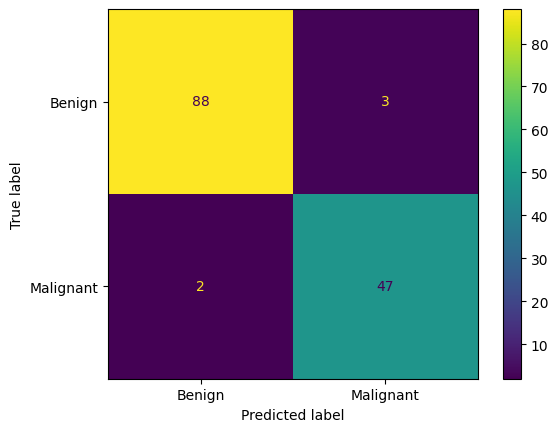

In [19]:
print('Results for Voting Classifier Ensemble - Hard Voting')
print('-'* 75)
y_train_pred =  ensemble_hard.predict(X_train)
y_test_pred =  ensemble_hard.predict(X_test)

print(f'Training Accuracy - {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy - {accuracy_score(y_test,y_test_pred)}')

print('Classification Report - Test Set')
print(classification_report(y_test,y_test_pred))

print('Confusion Matrix')
cm = confusion_matrix(y_test,y_test_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
disp.plot()
plt.show()

Results for Voting Classifier Ensemble - Soft Voting
---------------------------------------------------------------------------
Training Accuracy - 0.9838998211091234
Test Accuracy - 0.9571428571428572
Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        91
           1       0.94      0.94      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

Confusion Matrix


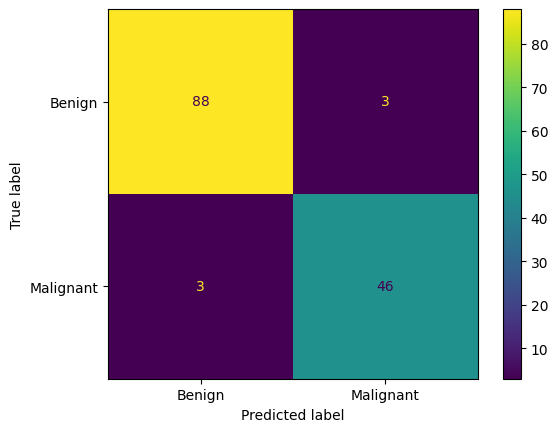

In [20]:
print('Results for Voting Classifier Ensemble - Soft Voting')
print('-'* 75)
y_train_pred =  ensemble_soft.predict(X_train)
y_test_pred =  ensemble_soft.predict(X_test)

print(f'Training Accuracy - {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy - {accuracy_score(y_test,y_test_pred)}')

print('Classification Report - Test Set')
print(classification_report(y_test,y_test_pred))

print('Confusion Matrix')
cm = confusion_matrix(y_test,y_test_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
disp.plot()
plt.show()

__Note__: to create an ensemble regression problems using regression models as base estimators and create the ensemble using VotingRegressor Class

# Advance Techniques for Ensemble Learning
These techniques use complex methods to merge predictions from many individual models. It aims for better predictive accuracy. They are employed for complex problems where high predictive accuracy is crucial


## Bagging

Bagging or Bootstrap Aggregating enhances the stability and accuracy of machine learning algorithms. This method creates multiple subsets from the original dataset, known as bootstrap samples, by selecting data points with replacement. Each subset trains a separate model.
For final predictions, Bagging combines the individual models' outputs by using voting (for classification tasks) or averaging (for regression tasks). This approach effectively reduces variance and helps prevent overfitting.

__Note:__ Random Forest is a popular algorithm that utilizes bagging by training multiple decision trees on different bootstrap samples and combining their predictions.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Bagging.png)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import BaggingClassifier 

In [22]:
# Read the data
url =  'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(url, names = names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data.shape

(768, 9)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
# Feature and Target 
X =  data.iloc[:, :-1]
y =  data.iloc[:, -1] 

## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [27]:
# Perform min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
## Create the Bagging Model
dtc = DecisionTreeClassifier(max_depth = 3)
bagging_model = BaggingClassifier(estimator = dtc, n_estimators = 100, random_state = 42, 
                                  oob_score = True)

In [29]:
# Train the bagging Classsifier
bagging_model.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=100, oob_score=True, random_state=42)

Results for Bagging Classifier
---------------------------------------------------------------------------
Training Accuracy - 0.7915309446254072
Test Accuracy - 0.7662337662337663
Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix


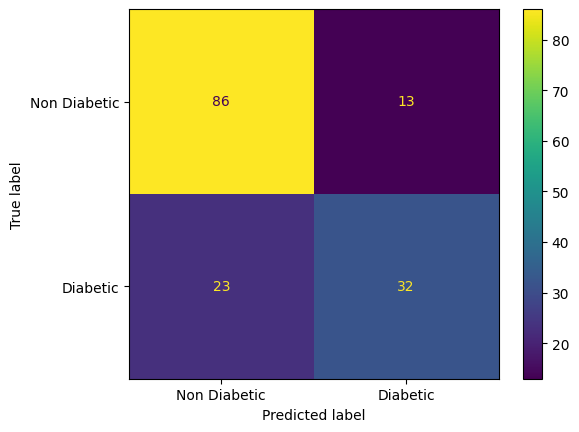

In [30]:
print('Results for Bagging Classifier')
print('-'* 75)
y_train_pred =  bagging_model.predict(X_train_scaled)
y_test_pred =  bagging_model.predict(X_test_scaled)
print(f'Training Accuracy - {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy - {accuracy_score(y_test,y_test_pred)}')

print('Classification Report - Test Set')
print(classification_report(y_test,y_test_pred))

print('Confusion Matrix')
cm = confusion_matrix(y_test,y_test_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non Diabetic', 'Diabetic'])
disp.plot()
plt.show()

## Out of Bag Concept

**In** bagging, __out-of-bag (OOB)__ data refers to instances not included in the bootstrap sample for training a specific base model. Since the process trains each model on a random subset of the original data, it naturally leaves out some instances.
These OOB instances serve as a built-in validation set for each model, allowing for an assessment of the model's performance on unseen data points. You can compute the OOB error, which offers an efficient way to evaluate the model's generalization ability.
This method eliminates the need for additional validation data or cross-validation procedures.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Out_Of_Bag_Concept.png)

- The OOB score is an estimate of performance that mimics cross-validation. It uses out-of-bag samples to estimate the model's accuracy.
 - This means that for each tree in a bagging ensemble, only the data not seen by the tree (out-of-bag data) are used to assess that tree’s performance.

In [31]:
oob_error = 1 - bagging_model.fit(X_train_scaled, y_train).oob_score_
print(f'Out of Bag Error : {oob_error: .4f}')

Out of Bag Error :  0.2378


__Observations:__
- The code computes the out-of-bag (OOB) error for a BaggingClassifier model using cross-validation.
- It calculates the OOB error by subtracting the OOB score from 1.
- The **OOB score** represents the model's accuracy on out-of-bag samples.
- The OOB error provides insight into the model's performance on unseen data points, indicating the misclassification rate of the model.

# Boosting

Boosting is a sequential ensemble technique where each model corrects its predecessor's mistakes. The main idea is to train models sequentially, each trying to correct the errors of the previous model.
The final prediction is a weighted sum of all the models' predictions. Boosting significantly reduces bias and variance, leading to more accurate models.

__Note:__ Popular boosting algorithms include AdaBoost, Gradient Boosting Machines (GBM), and XGBoost.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Boosting.png)

__Boosting Techniques__

There are various meta-algorithms in boosting that differentiate how the base models are aggregated, such as:
* Adaboost
* Gradient Boost
* XGBoost
* CatBoost
  
**Meta-algorithm** (or meta-learning) involves learning algorithms that are designed to learn how to combine the predictions of multiple machine learning models, often referred to as base models or learners, to improve overall performance


__AdaBoost Algorithm__

AdaBoost, an abbreviation for adaptive boosting, stands as one of the leading boosting algorithms with widespread adoption. It focuses on classification problems, aiming to transform a collection of weak classifiers into a single strong classifier. It increases the weights of misclassified instances, directing subsequent classifiers to pay more attention to challenging cases.

**The AdaBoost algorithm follows these steps:**

1. Initially, the algorithm assigns equal weights to all observations in the dataset.
2. A model is constructed using a subset of the data.
3. Predictions are made on the entire dataset using this model.
4. The algorithm computes errors by comparing these predictions to the actual values.
5. In the subsequent model creation, the algorithm assigns higher weights to incorrectly predicted data points.
6. Weights are determined based on error values, where higher errors result in heavier observation weights.
7. This iterative process continues until the error function stabilizes or the algorithm reaches the maximum limit of estimators.

In [32]:
## Implementation of Adaboost Classifier


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

In [34]:
# Load the dataset from the specified URL and assign column names to the DataFrame
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [35]:
# Drop Sample Code
data =  data.drop(columns = ['Sample code'])

## Replace `?` with 0 in Bare Nuclei 

data['Bare Nuclei'] =  data['Bare Nuclei'].apply(lambda x: 0 if x =='?' else int(x))


# Replace the class values to be binary (2 benign , 4 malignant)
data['Class'] =  data['Class'].replace({2:0, 4:1})


# Extract Features and target
X =  data.iloc[:, :-1]
y =  data.iloc[:, -1]

# Perform Train Test Split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size =0.2, random_state = 7)

In [36]:
kf = KFold(n_splits = 10, shuffle= True, random_state = 42)

# create the pipeline

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(random_state = 42, max_depth = 1)

adaboost_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std', StandardScaler()),
    ('clf', AdaBoostClassifier( n_estimators = 100, random_state = 42))
])

Results for AdaBoostClassifier 
---------------------------------------------------------------------------
Training Accuracy - 0.9856887298747764
Test Accuracy - 0.9642857142857143
Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.96      0.94      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Confusion Matrix


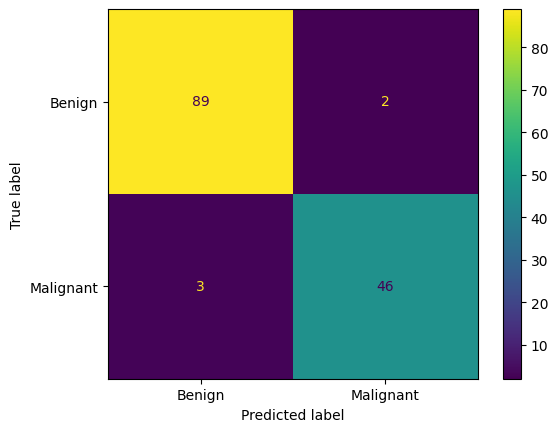

In [37]:
## Fit the ensemble on train data and evaluate on test data

adaboost_pipeline.fit(X_train,y_train)

print('Results for AdaBoostClassifier ')
print('-'* 75)
y_train_pred =  adaboost_pipeline.predict(X_train)
y_test_pred =  adaboost_pipeline.predict(X_test)

print(f'Training Accuracy - {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy - {accuracy_score(y_test,y_test_pred)}')

print('Classification Report - Test Set')
print(classification_report(y_test,y_test_pred))

print('Confusion Matrix')
cm = confusion_matrix(y_test,y_test_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
disp.plot()
plt.show()

## Gradient Boosting Machine
Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.
Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.
Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models

**Gradient Boosting involves three main components:**

* Loss Function: The choice of loss function depends on the type of problem being solved (e.g., regression, classification). The goal is to find a model that minimizes the loss function.
* Weak Learners: Gradient Boosting uses decision trees as the default weak learner. These trees are usually of a fixed size and depth and are created one at a time.
* Additive Model: Instead of adjusting the weights of data points like AdaBoost, Gradient Boosting fits new models to the residual errors made by previous models. Essentially, each new model is built on the errors of the whole ensemble so far.

## __XGBoost__
XGBoost, or eXtreme Gradient Boosting, stands out as a premier machine learning framework, widely adopted for its proficiency in supervised learning tasks including classification, regression, and ranking. This advanced algorithm builds upon the principles of gradient boosting and is celebrated for its exceptional accuracy and scalability in handling complex predictive modeling challenges.

 **XGBoost offers many essential features that make it ideal for classification tasks. Some of the reasons include:**
 
* High performance: As mentioned above, XGBoost is optimized for speed and efficiency, making it appropriate for large datasets and real-time applications.
* Regularization methods: L1 (Lasso) and L2 (Ridge) regularisation terms are included in XGBoost to avoid overfitting and increase generalization.
* Handle missing data: Moreover, XGBoost can handle missing data automatically, minimizing the need for preprocessing and imputation.
* Requires Target values to Label Encoded as default nature

## CatBoost

Catboost is a variant of gradient boosting that can handle both categorical and numerical features. It does not require any feature encodings techniques like One-Hot Encoder or Label Encoder to convert categorical features into numerical features.

In [38]:
## Implementation of Gradient Boosting, XGBoost and CatBoost
!pip install xgboost
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 2.8 MB/s eta 0:00:37
    --------------------------------------- 1.3/102.4 MB 3.7 MB/s eta 0:00:28
    --------------------------------------- 1.8/102.4 MB 3.2 MB/s eta 0:00:32
   - -------------------------------------- 2.6/102.4 MB 3.3 MB/s eta 0:00:31
   - -------------------------------------- 3.1/102.4 MB 3.3 MB/s eta 0:00:31
   - -------------------------------------- 3.7/102.4 MB 3.1 MB/s eta 0:00:32
   - -------------------------------------- 3.9/102.4 MB 3.0 MB/s eta 0:00:33
   - -------------------------------------- 4.5/102.4 MB 2.8 MB/s eta 0:00:35
   - -------------------------------------- 5.0/102.4 MB 2.8 MB/s eta 0:00:36
   -- ------------------------------------- 5.5/102.4 MB 2.7 MB/s eta 0:00:36
   -- ------------------------------------- 6.0/102.4 MB 2.8 MB/s eta 0:00:36
   -- ------------------------------------- 6.6/102.4 MB 2.8 MB/s eta 0

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

Results for Gradient Boosting Classifier 
---------------------------------------------------------------------------
Training Accuracy - 1.0
Test Accuracy - 0.95
Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.94      0.92      0.93        49

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140

Confusion Matrix


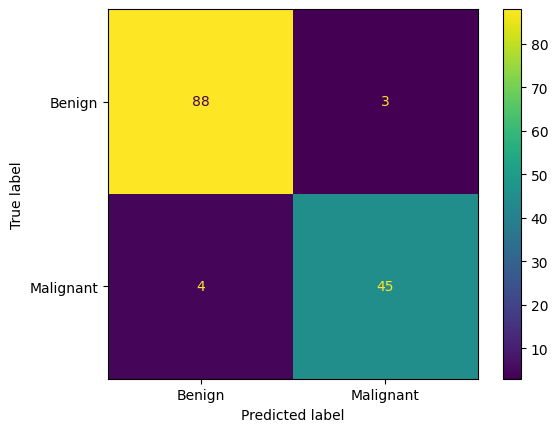

In [40]:
## Gradient Boosting Machine

gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std', StandardScaler()),
    ('clf', GradientBoostingClassifier( n_estimators = 100, random_state = 42))
])


## Fit the ensemble on train data and evaluate on test data

gb_pipeline.fit(X_train,y_train)

print('Results for Gradient Boosting Classifier ')
print('-'* 75)
y_train_pred =  gb_pipeline.predict(X_train)
y_test_pred =  gb_pipeline.predict(X_test)

print(f'Training Accuracy - {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy - {accuracy_score(y_test,y_test_pred)}')

print('Classification Report - Test Set')
print(classification_report(y_test,y_test_pred))

print('Confusion Matrix')
cm = confusion_matrix(y_test,y_test_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
disp.plot()
plt.show()

Results for XGB  Classifier 
---------------------------------------------------------------------------
Training Accuracy - 1.0
Test Accuracy - 0.9428571428571428
Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        91
           1       0.94      0.90      0.92        49

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.94       140
weighted avg       0.94      0.94      0.94       140

Confusion Matrix


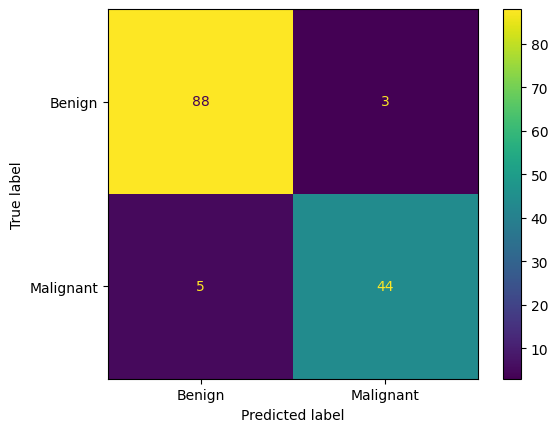

In [41]:
## XGboost

xgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std', StandardScaler()),
    ('clf', XGBClassifier( n_estimators = 100, random_state = 42))
])


## Fit the ensemble on train data and evaluate on test data

xgb_pipeline.fit(X_train,y_train)

print('Results for XGB  Classifier ')
print('-'* 75)
y_train_pred =  xgb_pipeline.predict(X_train)
y_test_pred =  xgb_pipeline.predict(X_test)

print(f'Training Accuracy - {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy - {accuracy_score(y_test,y_test_pred)}')

print('Classification Report - Test Set')
print(classification_report(y_test,y_test_pred))

print('Confusion Matrix')
cm = confusion_matrix(y_test,y_test_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
disp.plot()
plt.show()

Learning rate set to 0.066386
0:	learn: 0.6440093	total: 54.7ms	remaining: 5.42s
1:	learn: 0.6024884	total: 56.2ms	remaining: 2.75s
2:	learn: 0.5649157	total: 57.5ms	remaining: 1.86s
3:	learn: 0.5305725	total: 59ms	remaining: 1.42s
4:	learn: 0.4987046	total: 60.6ms	remaining: 1.15s
5:	learn: 0.4709172	total: 63.7ms	remaining: 997ms
6:	learn: 0.4450013	total: 65.5ms	remaining: 870ms
7:	learn: 0.4207502	total: 66.7ms	remaining: 767ms
8:	learn: 0.3993741	total: 68.2ms	remaining: 690ms
9:	learn: 0.3797342	total: 69.6ms	remaining: 626ms
10:	learn: 0.3610375	total: 71.2ms	remaining: 576ms
11:	learn: 0.3433744	total: 72.6ms	remaining: 532ms
12:	learn: 0.3276457	total: 74.1ms	remaining: 496ms
13:	learn: 0.3117065	total: 76.1ms	remaining: 467ms
14:	learn: 0.2982926	total: 77ms	remaining: 437ms
15:	learn: 0.2857684	total: 78.4ms	remaining: 412ms
16:	learn: 0.2732984	total: 79.8ms	remaining: 390ms
17:	learn: 0.2623552	total: 81.4ms	remaining: 371ms
18:	learn: 0.2513044	total: 82.2ms	remaining: 35

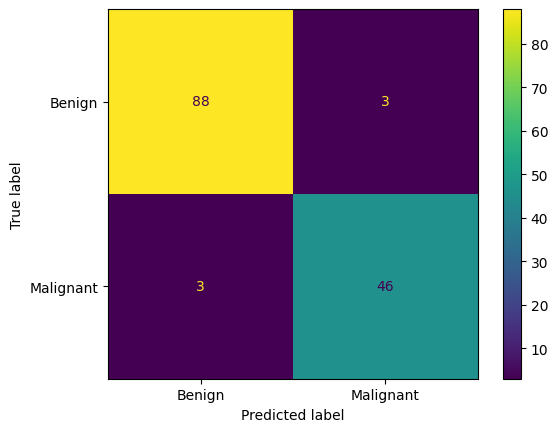

In [42]:
## Catboost

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std', StandardScaler()),
    ('clf', CatBoostClassifier( n_estimators = 100, random_state = 42))
])


## Fit the ensemble on train data and evaluate on test data

cat_pipeline.fit(X_train,y_train)

print('Results for Cat Boost  Classifier ')
print('-'* 75)
y_train_pred =  cat_pipeline.predict(X_train)
y_test_pred =  cat_pipeline.predict(X_test)

print(f'Training Accuracy - {accuracy_score(y_train,y_train_pred)}')
print(f'Test Accuracy - {accuracy_score(y_test,y_test_pred)}')

print('Classification Report - Test Set')
print(classification_report(y_test,y_test_pred))

print('Confusion Matrix')
cm = confusion_matrix(y_test,y_test_pred)
disp =  ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
disp.plot()
plt.show()

# __Date: 23-07-2025__

__Advantages of Boosting__
- It enhances accuracy by reducing both bias and variance significantly.
- It is adaptable and compatible with various types of models.
- It is efficient in complex scenarios where simple models struggle.

__Disadvantages of Boosting__
- It is more susceptible to overfitting compared to bagging when dealing with noisy data.
- It demands more computational resources as models are trained sequentially.
- It requires careful parameter tuning to prevent overfitting.

# Stacking

Stacking combines multiple classification or regression models via a meta model which could be a meta-classifier or a meta-regressor. After training the base models on the complete dataset, the meta-model trains on the base models' outputs as features, to give final prediction.
This technique leverages the strengths of each base model and can achieve higher accuracy.
* In stacking, as opposed to bagging, a variety of models (not solely decision trees) are employed, all of which are trained on the same full dataset rather than on subsets.
* Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/image7.png)

- Stacking aims to leverage the advantages of different base models by inputting their predictions into a meta-model.
The structure of a stacking model consists of multiple base models, also known as level-0 models, alongside a meta-model that integrates their predictions, known as the level-1 model.
* Level-0 Models (**Base Models**): These models are trained on the full training dataset, and their individual predictions are aggregated.
* Level-1 Model (**Meta-Model**): This model is designed to optimally combine the predictions of multiple base models to generate the final prediction.

In [43]:
# install vecstack
!pip install vecstack

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19874 sha256=bbd0da28c66f5325072dbfe924689c27676118704cb2ffb5aa4c2960224fcd7a
  Stored in directory: c:\users\vivek\appdata\local\pip\cache\wheels\60\62\ce\d16e9d9fb8303d3d80c6b7f536fb90a016a06dd5941df63ae7
Successfully built vecstack


In [44]:
# import libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # base model 1
from sklearn.ensemble import RandomForestClassifier # base model 2
from xgboost import XGBClassifier # base model 3

from sklearn.linear_model import LogisticRegression # to be used as meta model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

from vecstack import stacking


In [45]:
link= 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

names =  ['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alkalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
         'Proline']

In [46]:
# Read the data 
df = pd.read_csv(link, header = None, names = names)
df.head()

,Class,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alkalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [48]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [49]:
## Target Class Distribution
df['Class'].value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [50]:
# Seperate Feature and target
X =  df.drop(columns  =  ['Class'])
y =  df['Class']

In [51]:
# Transform the target variable using labelencoder

le = LabelEncoder()
y =  le.fit_transform(y)

In [52]:
# Split the data  in train and test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size =  0.2, random_state = 42)

In [53]:
# Define base models

models =  [KNeighborsClassifier(n_neighbors = 5), 
          RandomForestClassifier(n_estimators = 100, random_state = 42), 
          XGBClassifier()]

meta_model =  LogisticRegression(max_iter =  10000)

__S Train__ refers to a subset of the original training data used for training base models in a stacking ensemble.

__S Test__ is another subset used to generate base model predictions, serving as input for the meta-model. It is crucial for generating predictions from these base models, which then act as new features for the meta-model.
This two-step approach allows the ensemble to capture and leverage the unique strengths of each base model, thus improving overall predictive performance.

In [54]:
## Perform Stacking

S_train, S_test = stacking(models, X_train, y_train, X_test, 
                          regression = False, metric = accuracy_score, 
                          n_folds = 5, stratified = True, shuffle = True, 
                          random_state = 42, verbose = 2)

# train meta Model
meta_model.fit(S_train, y_train)

# make predictions on S test using meta model
y_test_pred = meta_model.predict(S_test)

# print accuracy 
acc = accuracy_score(y_test, y_test_pred)
print(f'Accuarcy of Stacking ensemble with Logistic Regression meta model : {acc: .4f}')

C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Vivek\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.82758621]
    fold  1:  [0.65517241]
    fold  2:  [0.64285714]
    fold  3:  [0.64285714]
    fold  4:  [0.75000000]
    ----
    MEAN:     [0.70369458] + [0.07382427]
    FULL:     [0.70422535]

model  1:     [RandomForestClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.96551724]
    fold  2:  [1.00000000]
    fold  3:  [0.92857143]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.97881773] + [0.02845227]
    FULL:     [0.97887324]

model  2:     [XGBClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.89655172]
    fold  2:  [0.92857143]
    fold  3:  [0.92857143]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.95073892] + [0.04188641]
    FULL:     [0.95070423]

Accuarcy of Stacking ensemble with Logistic Regression meta model :  0.9722


__Advantages of Stacking__

- Accomplishes greater accuracy than simplistic ensemble techniques
- Enables diversity among models
- Possesses the capability to rectify errors made by base models

__Disadvantages of Stacking__
- Is more challenging to implement and comprehend
- Poses a risk of overfitting the meta-model
- Requires careful selection of both base and meta-models

In [55]:
y_test_pred.plot.kde()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'